In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import streamlit as st
import holidays

In [38]:
# Cargar los CSVs desde ../data/raw/entrenamiento (ruta relativa desde notebooks/)
from pathlib import Path

ventas_path = Path('..') / 'data' / 'raw' / 'entrenamiento' / 'ventas.csv'
competencia_path = Path('..') / 'data' / 'raw' / 'entrenamiento' / 'competencia.csv'

print('Leyendo:', ventas_path)
print('Leyendo:', competencia_path)

#carga los archicos cvs en dataf
ventas_df = pd.read_csv(ventas_path)
competencia_df = pd.read_csv(competencia_path)

# Mostrar las primeras filas para verificar

print('Ventas:', ventas_df.shape)
print('Competencia:', competencia_df.shape)
print(ventas_df.head())
print(competencia_df.head())

Leyendo: ..\data\raw\entrenamiento\ventas.csv
Leyendo: ..\data\raw\entrenamiento\competencia.csv
Ventas: (3552, 10)
Competencia: (3552, 5)
        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

 

In [39]:
ventas_df.columns

#muestra las primeras filas de ventas_df

Index(['fecha', 'producto_id', 'nombre', 'categoria', 'subcategoria',
       'precio_base', 'es_estrella', 'unidades_vendidas', 'precio_venta',
       'ingresos'],
      dtype='object')

In [40]:
ventas_df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74


In [41]:
competencia_df.head()

,fecha,producto_id,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,82.96,111.88,97.43
1,2021-10-25,PROD_002,112.56,108.61,115.58
2,2021-10-25,PROD_003,79.79,78.44,80.11
3,2021-10-25,PROD_004,72.60,67.29,74.45
4,2021-10-25,PROD_005,37.71,33.60,33.07


In [42]:
competencia_df.columns
#proporciona el nombre de las columnas en competencia_df

Index(['fecha', 'producto_id', 'Amazon', 'Decathlon', 'Deporvillage'], dtype='object')

In [43]:
# 1. VALIDACION DE CALIDAD DE DATOS PARA VENTAS_DF

print ("informe de calidad de datos: ventas_df \n")

# 2. Análisis de Tipos de Variables y Nulos
print("--- 1. TIPOS DE VARIABLES Y ESTRUCTURA ---")
print(ventas_df.dtypes)

print("\n")

# Análisis de Valores Nulos por Columna
print("--- 2. VALORES NULOS POR COLUMNA ---")
print(ventas_df.isnull().sum())
print(ventas_df.isna().sum())

# 3. Análisis de Duplicados
print("\n--- 3. FILAS DUPLICADAS ---")
duplicados = ventas_df.duplicated().sum()
print(f"Total de registros duplicados: {duplicados}")

# 4. Estadísticas Descriptivas
print("\n--- 4. ESTADÍSTICAS DESCRIPTIVAS ---")
print(ventas_df.describe(include='all')) # Incluye numéricas y categóricas

# 5. Resumen Final de Calidad

print("\n" + "="*30)
print("RESUMEN FINAL DE CALIDAD")
print("="*30)
print(f"Total de registros: {len(ventas_df)}")
print(f"Total de columnas: {len(ventas_df.columns)}")
print(f"Total de nulos en el DataFrame: {ventas_df.isna().sum().sum()}")
print(f"Porcentaje de nulos: {(ventas_df.isna().sum().sum() / ventas_df.size) * 100:.2f}%")
print(f"Total de duplicados: {duplicados}")

informe de calidad de datos: ventas_df 

--- 1. TIPOS DE VARIABLES Y ESTRUCTURA ---
fecha                 object
producto_id           object
nombre                object
categoria             object
subcategoria          object
precio_base            int64
es_estrella             bool
unidades_vendidas      int64
precio_venta         float64
ingresos             float64
dtype: object


--- 2. VALORES NULOS POR COLUMNA ---
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64

--- 3. FILAS DUPLICADAS ---
Total de registros duplicados: 0

--- 4. ESTADÍSTICAS DESC

In [44]:
#validacion de calidad de datos para competencia_df
print ("\n\ninforme de calidad de datos: competencia_df \n")

# 2. Análisis de Tipos de Variables y Estructura
print("--- 1. TIPOS DE VARIABLES Y ESTRUCTURA (COMPETENCIA) ---")
print(competencia_df.dtypes)
print("\n")


# 3. Análisis de Valores Nulos
print("\n--- 2. VALORES NULOS POR COLUMNA ---")
print(competencia_df.isnull().sum())
print("\n")

# 4. Análisis de Duplicados
print("\n--- 3. FILAS DUPLICADAS ---")
duplicados_comp = competencia_df.duplicated().sum()
print(f"Total de registros duplicados en competencia: {duplicados_comp}")
print("\n")

# 5. Estadísticas Descriptivas 
print("\n--- 4. ESTADÍSTICAS DESCRIPTIVAS (PRECIOS COMPETENCIA) ---")
print(competencia_df.describe(include='all')) # Incluye numéricas y categóricas
print("\n")

# 6. Resumen Final de Calidad
print("\n" + "="*35)
print("RESUMEN FINAL DE CALIDAD: COMPETENCIA")
print("="*35)
print(f"Total de registros: {len(competencia_df)}")
print(f"Total de columnas: {len(competencia_df.columns)}")
print(f"Columnas analizadas: {', '.join(competencia_df.columns)}")
print(f"Total de nulos: {competencia_df.isna().sum().sum()}")
print(f"Total de duplicados: {duplicados_comp}")



informe de calidad de datos: competencia_df 

--- 1. TIPOS DE VARIABLES Y ESTRUCTURA (COMPETENCIA) ---
fecha            object
producto_id      object
Amazon          float64
Decathlon       float64
Deporvillage    float64
dtype: object



--- 2. VALORES NULOS POR COLUMNA ---
fecha           0
producto_id     0
Amazon          0
Decathlon       0
Deporvillage    0
dtype: int64



--- 3. FILAS DUPLICADAS ---
Total de registros duplicados en competencia: 0



--- 4. ESTADÍSTICAS DESCRIPTIVAS (PRECIOS COMPETENCIA) ---
             fecha producto_id       Amazon    Decathlon  Deporvillage
count         3552        3552  3552.000000  3552.000000   3552.000000
unique         148          24          NaN          NaN           NaN
top     2021-10-25    PROD_001          NaN          NaN           NaN
freq            24         148          NaN          NaN           NaN
mean           NaN         NaN   118.623407   111.412182    118.894628
std            NaN         NaN   156.095628   148.5

In [45]:
# 1. Convertir fecha a formato datetime
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha']) 
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'])

#verificar que las fechas se hayan convertido correctamente
print("\n--- VERIFICACIÓN DE CONVERSIÓN DE FECHAS ---")
print("Ventas_df - Tipos de datos:")
print(ventas_df.dtypes)
print("\nCompetencia_df - Tipos de datos:")
print(competencia_df.dtypes)




--- VERIFICACIÓN DE CONVERSIÓN DE FECHAS ---
Ventas_df - Tipos de datos:
fecha                datetime64[ns]
producto_id                  object
nombre                       object
categoria                    object
subcategoria                 object
precio_base                   int64
es_estrella                    bool
unidades_vendidas             int64
precio_venta                float64
ingresos                    float64
dtype: object

Competencia_df - Tipos de datos:
fecha           datetime64[ns]
producto_id             object
Amazon                 float64
Decathlon              float64
Deporvillage           float64
dtype: object


In [46]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB


In [47]:
competencia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3552 non-null   datetime64[ns]
 1   producto_id   3552 non-null   object        
 2   Amazon        3552 non-null   float64       
 3   Decathlon     3552 non-null   float64       
 4   Deporvillage  3552 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 138.9+ KB


In [87]:
competencia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3552 non-null   datetime64[ns]
 1   producto_id   3552 non-null   object        
 2   Amazon        3552 non-null   float64       
 3   Decathlon     3552 non-null   float64       
 4   Deporvillage  3552 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 138.9+ KB


## integracion ventas y competencia

In [88]:
#integrar ventas_df y competecnia_df  en un nuevo dataframe df usando fecha y producto_id como claves 
df = pd.merge(ventas_df, competencia_df,how='inner',
              on=['fecha', 'producto_id'] )
#mostrar las primeras filas del dataframe resultante
print(df.head())

       fecha producto_id                            nombre categoria  \
0 2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1 2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2 2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3 2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4 2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  Amazon  Decathlon  Deporvillage  
0        118.36    710.16   82.96     111.88         97.43  
1        136.82   1368.2

In [89]:
df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


## Analisis exploratorio completo de `df`

A continuacion se presentan diferentes analisis y visualizaciones para netender el comprtamiento  de las ventas y la competencia


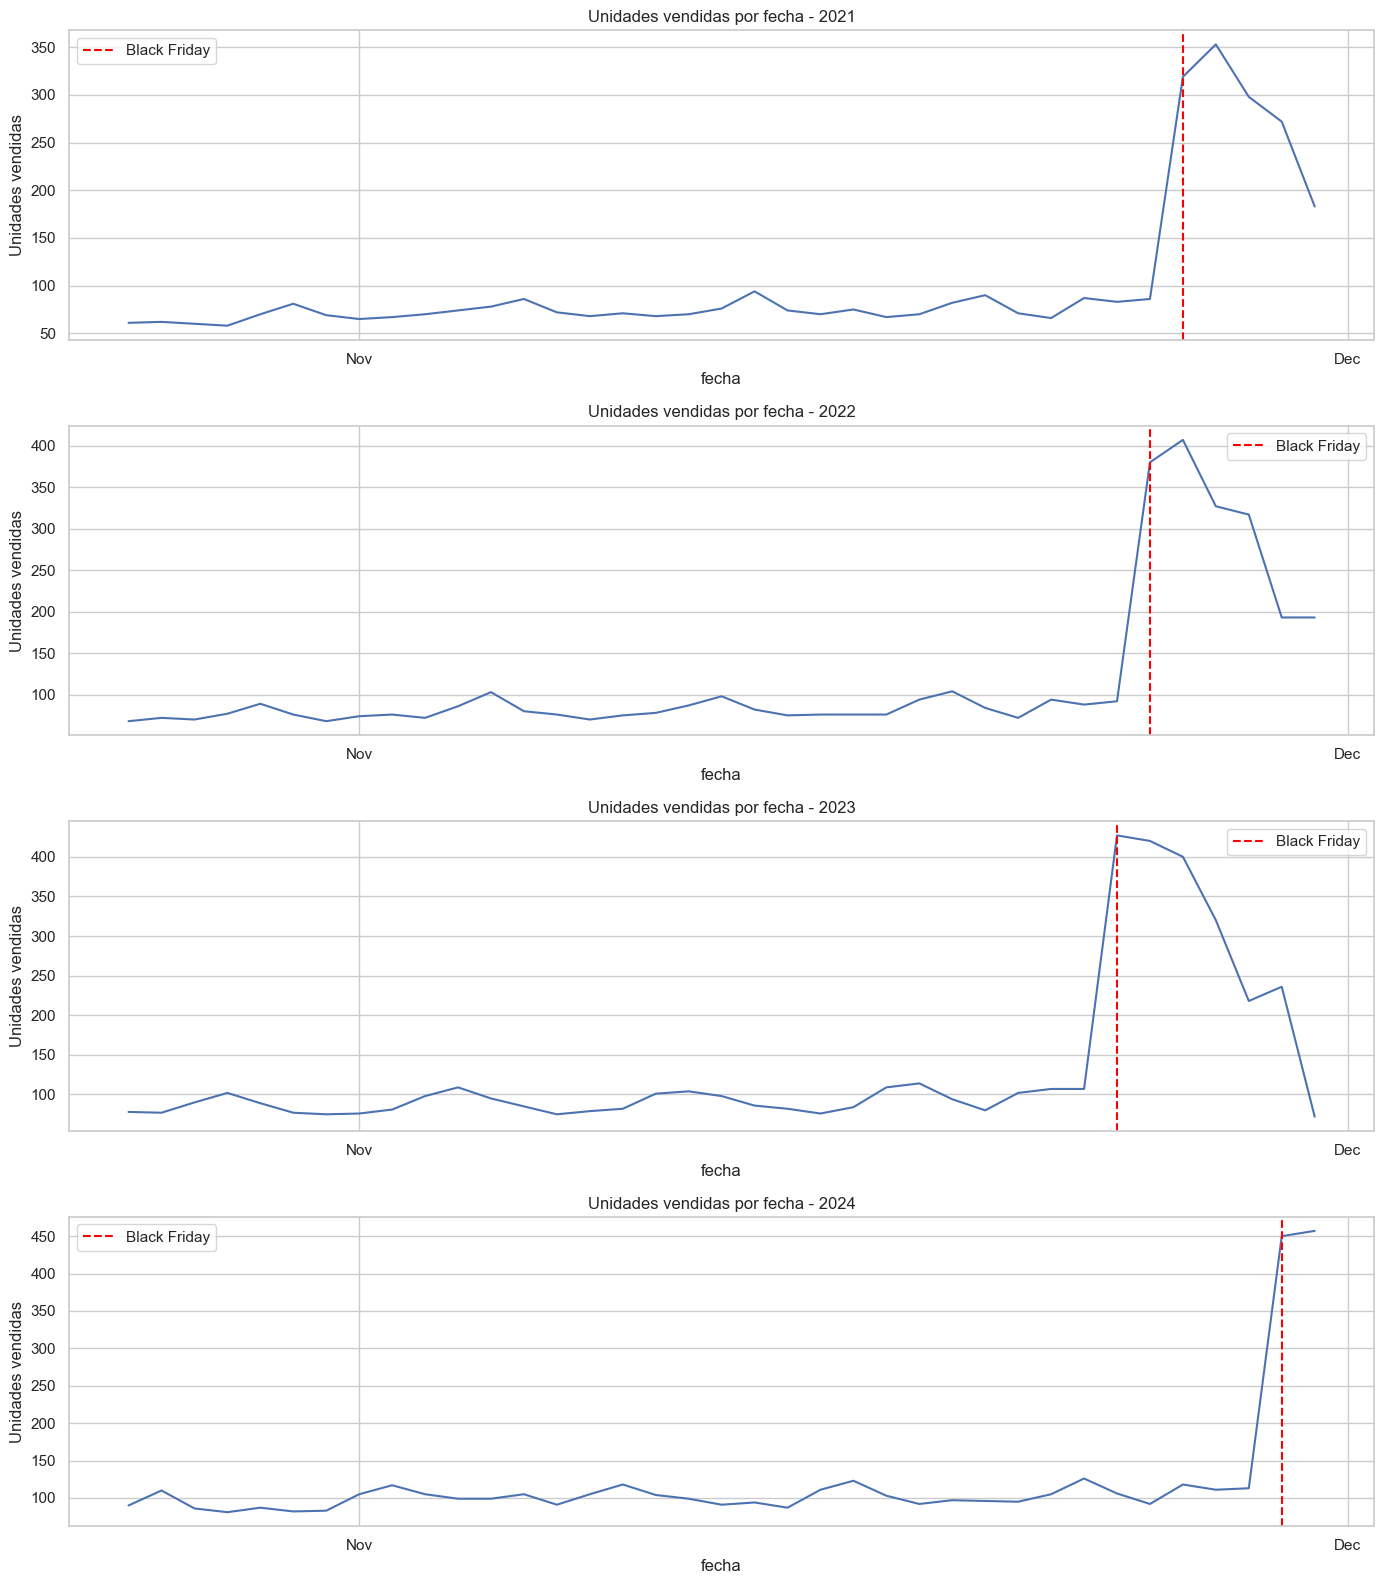

In [91]:
# Gráfico de líneas temporales por año con suma de unidades vendidas y marcando Black Fridays
import matplotlib.dates as mdates
from pandas.tseries.holiday import USFederalHolidayCalendar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraer año y día de la semana
if 'año' not in df.columns:
    df['año'] = df['fecha'].dt.year
if 'mes' not in df.columns:
    df['mes'] = df['fecha'].dt.month
if 'dia_semana' not in df.columns:
    df['dia_semana'] = df['fecha'].dt.day_name()

# Identificar Black Fridays (Último viernes de noviembre)
def get_black_fridays(years):
    bf_dates = []
    for y in years:
        nov = pd.date_range(start=f'{y}-11-01', end=f'{y}-11-30', freq='D')
        fridays = nov[nov.weekday == 4]
        bf_dates.append(fridays[-1])
    return bf_dates

black_fridays = get_black_fridays(df['año'].unique())

fig, axes = plt.subplots(len(df['año'].unique()), 1, figsize=(14, 4*len(df['año'].unique())), sharex=False)
if len(df['año'].unique()) == 1:
    axes = [axes]
for i, year in enumerate(sorted(df['año'].unique())):
    df_year = df[df['año'] == year]
    df_group = df_year.groupby('fecha')['unidades_vendidas'].sum().reset_index()
    sns.lineplot(data=df_group, x='fecha', y='unidades_vendidas', ax=axes[i])
    axes[i].set_title(f'Unidades vendidas por fecha - {year}')
    axes[i].set_ylabel('Unidades vendidas')
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Marcar Black Friday
    bf = [d for d in black_fridays if d.year == year]
    for bfd in bf:
        axes[i].axvline(bfd, color='red', linestyle='--', label='Black Friday')
    axes[i].legend()

plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13764\890106781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_dia.index, y=df_dia.values, palette='viridis')


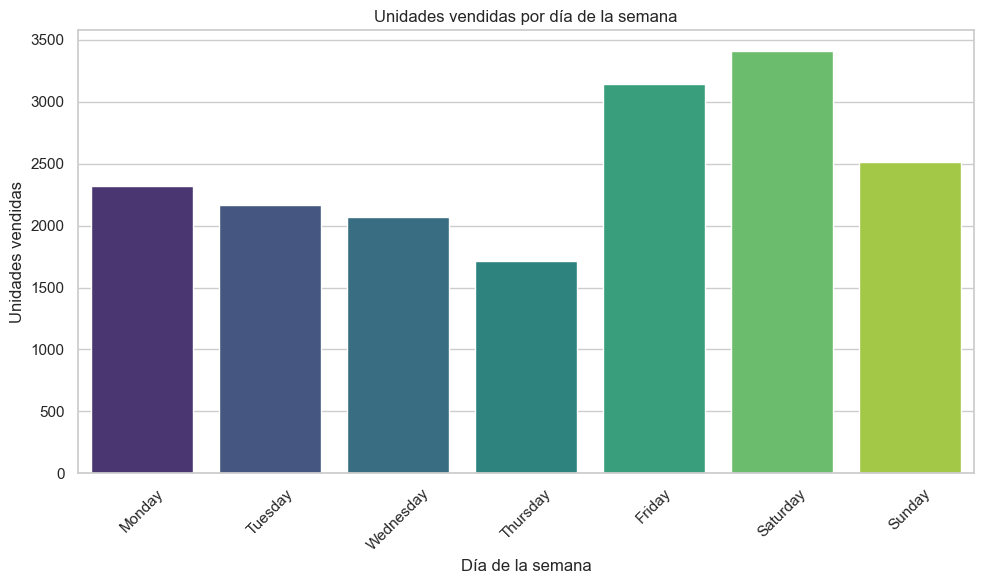

In [92]:
# Gráfico de suma de unidades vendidas por día de la semana
plt.figure(figsize=(10,6))
df_dia = df.groupby('dia_semana')['unidades_vendidas'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=df_dia.index, y=df_dia.values, palette='viridis')
plt.title('Unidades vendidas por día de la semana')
plt.ylabel('Unidades vendidas')
plt.xlabel('Día de la semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13764\2081135821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cat.index, y=df_cat.values, palette='crest')


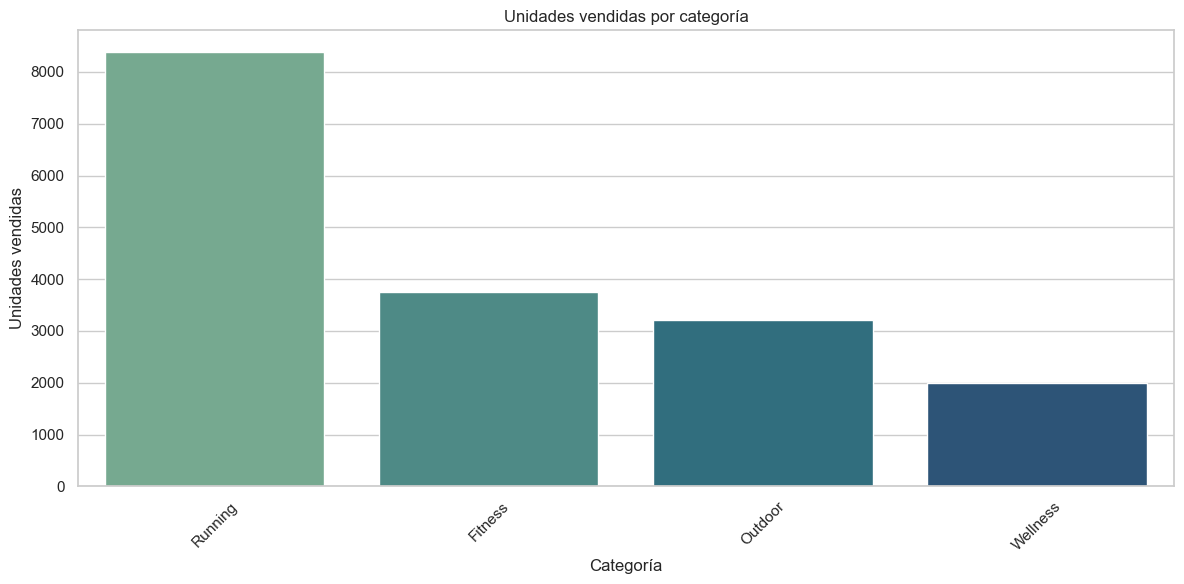

In [95]:
# Gráfico de suma de unidades vendidas por categoría
plt.figure(figsize=(12,6))
df_cat = df.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False)
sns.barplot(x=df_cat.index, y=df_cat.values, palette='crest')
plt.title('Unidades vendidas por categoría')
plt.ylabel('Unidades vendidas')
plt.xlabel('Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13764\3916423582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_subcat.index, y=df_subcat.values, palette='mako')


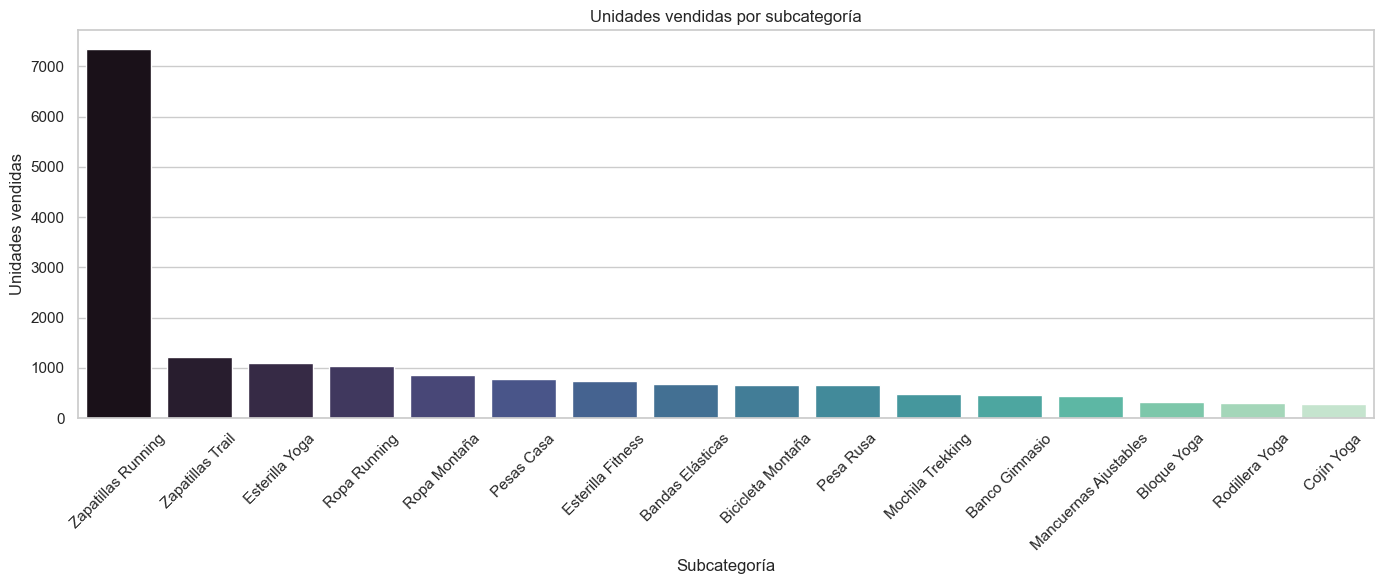

In [97]:
# Gráfico de suma de unidades vendidas por subcategoria
plt.figure(figsize=(14,6))
df_subcat = df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False)
sns.barplot(x=df_subcat.index, y=df_subcat.values, palette='mako')
plt.title('Unidades vendidas por subcategoría')
plt.ylabel('Unidades vendidas')
plt.xlabel('Subcategoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13764\1558851431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nombre', y='unidades_vendidas', data=df_top, palette='rocket')


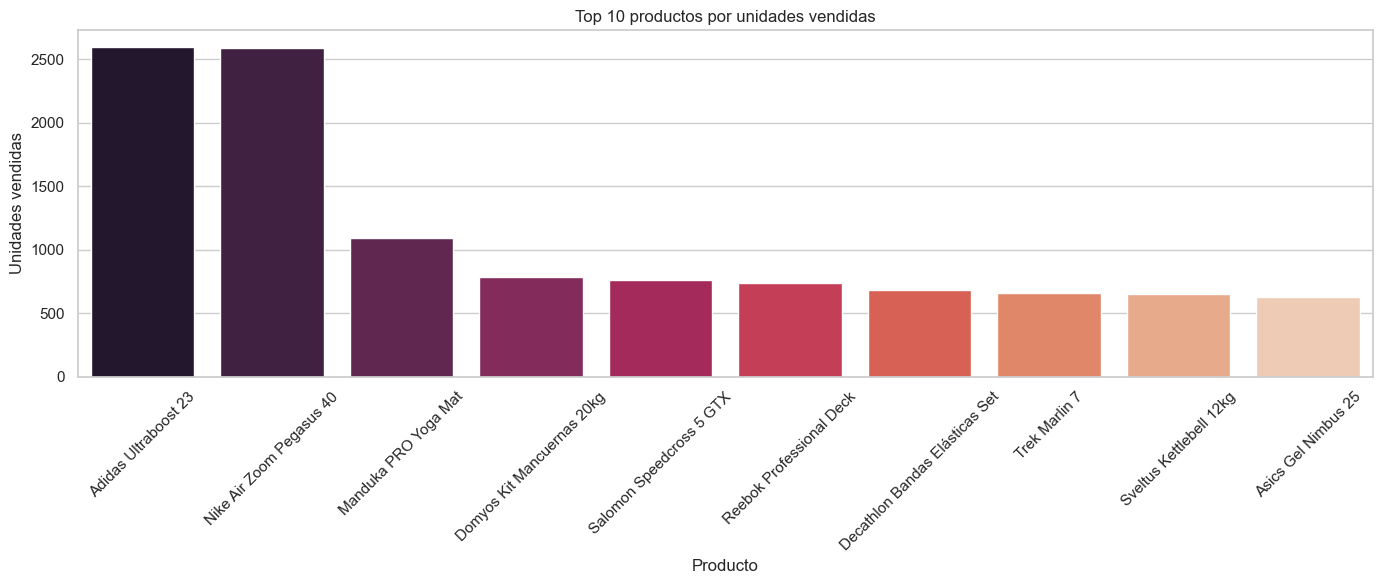

In [98]:
# Gráfico de los top productos por unidades vendidas
plt.figure(figsize=(14,6))
top_n = 10
df_top = df.groupby(['producto_id', 'nombre'])['unidades_vendidas'].sum().sort_values(ascending=False).head(top_n).reset_index()
sns.barplot(x='nombre', y='unidades_vendidas', data=df_top, palette='rocket')
plt.title(f'Top {top_n} productos por unidades vendidas')
plt.ylabel('Unidades vendidas')
plt.xlabel('Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


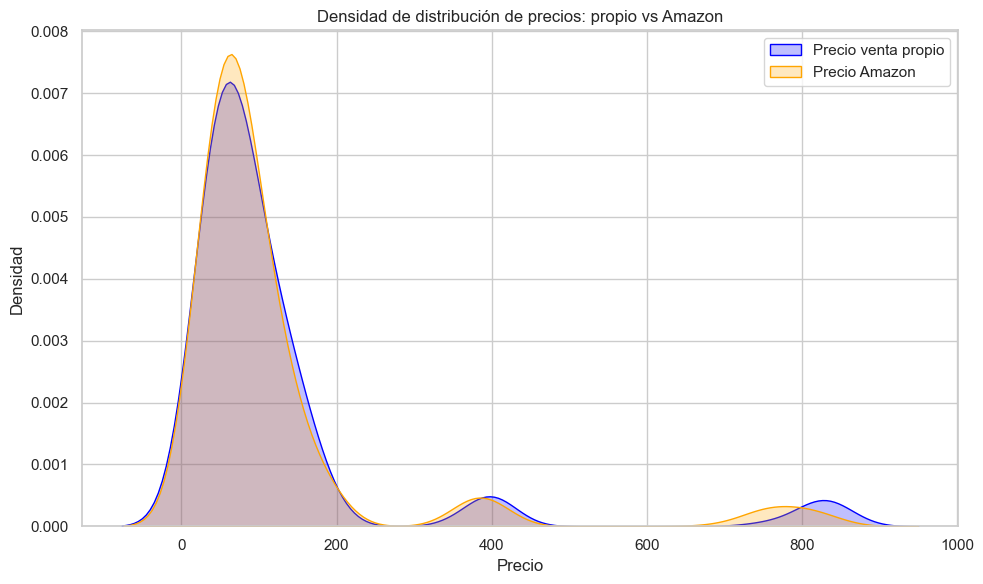

In [99]:
# Análisis de la densidad de distribución de los precios propios y de Amazon
plt.figure(figsize=(10,6))
sns.kdeplot(df['precio_venta'], label='Precio venta propio', fill=True, color='blue')
sns.kdeplot(df['Amazon'], label='Precio Amazon', fill=True, color='orange')
plt.title('Densidad de distribución de precios: propio vs Amazon')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Creación de variables temporales y de calendario usando holidays para España
import holidays
import pandas 

df['año'] = df['fecha'].dt.year

df['mes'] = df['fecha'].dt.month
df['dia_mes'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.day_name()
df['es_fin_semana'] = df['dia_semana'].isin(['Saturday', 'Sunday'])

# Festivos en España
festivos_es = holidays.country_holidays('ES', years=df['año'].unique())
df['es_festivo'] = df['fecha'].isin(festivos_es)

# Black Friday (último viernes de noviembre)
def es_black_friday(fecha):
    if fecha.month == 11:
        nov = pd.date_range(start=f'{fecha.year}-11-01', end=f'{fecha.year}-11-30', freq='D')
        fridays = nov[nov.weekday == 4]
        return fecha == fridays[-1]
    return False

df['es_black_friday'] = df['fecha'].apply(es_black_friday)

# Cyber Monday (primer lunes después de Black Friday)
def es_cyber_monday(fecha):
    if fecha.month == 11 or fecha.month == 12:
        nov = pd.date_range(start=f'{fecha.year}-11-01', end=f'{fecha.year}-11-30', freq='D')
        fridays = nov[nov.weekday == 4]
        cyber_monday = fridays[-1] + pd.Timedelta(days=3)
        return fecha == cyber_monday
    return False    
df['es_cyber_monday'] = df['fecha'].apply(es_cyber_monday)

#variable; trismestre

trimestre_map = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}
df['trimestre'] = df['mes'].map(trimestre_map)

#variable semana del año
df['semana_año'] = df['fecha'].dt.isocalendar().week

#variable: dia laborable (no festivo y no fin de semana)

df['es_dia_laborable'] = ~(df['es_fin_semana'] | df['es_festivo'])

#variable inicio/fin de mes
df['es_inicio_mes'] = df['dia_mes'] <= 3
df['es_fin_mes'] = df['dia_mes'] >= df['fecha'].dt.days_in_month - 2

# mostrar las primeras filas con las nuevas variables
df.head()


In [104]:
# Creación de lags y media móvil de 7 días para unidades vendidas, por año
lags = range(1, 8)
for lag in lags:
    df[f'unidades_vendidas_lag{lag}'] = df.groupby('año')['unidades_vendidas'].shift(lag)

# Media móvil de 7 días
# Ordenar por fecha para cada año
for year in df['año'].unique():
    mask = df['año'] == year
    df.loc[mask, 'unidades_vendidas_ma7'] = df.loc[mask].sort_values('fecha')['unidades_vendidas'].rolling(window=7).mean().values

# Eliminar registros con nulos en alguna de las nuevas variables de lag o media móvil
cols_lag_ma = [f'unidades_vendidas_lag{lag}' for lag in lags] + ['unidades_vendidas_ma7']
df = df.dropna(subset=cols_lag_ma)

# Mostrar las primeras filas para verificar
print(df[cols_lag_ma + ['fecha', 'año', 'unidades_vendidas']].head())


    unidades_vendidas_lag1  unidades_vendidas_lag2  unidades_vendidas_lag3  \
7                      2.0                     2.0                     2.0   
8                      2.0                     2.0                     2.0   
9                      2.0                     2.0                     2.0   
10                     2.0                     2.0                     2.0   
11                     3.0                     2.0                     2.0   

    unidades_vendidas_lag4  unidades_vendidas_lag5  unidades_vendidas_lag6  \
7                      2.0                     2.0                    10.0   
8                      2.0                     2.0                     2.0   
9                      2.0                     2.0                     2.0   
10                     2.0                     2.0                     2.0   
11                     2.0                     2.0                     2.0   

    unidades_vendidas_lag7  unidades_vendidas_ma7      fecha  

In [106]:
df.shape

(3524, 34)

In [107]:
df.groupby('año').size()

año
2021    881
2022    881
2023    881
2024    881
dtype: int64

In [109]:
#variables de descuento porcentaje
#formila: precio venta - precio base /precio base *100
df['descuento_porcentaje'] = (df['precio_venta'] - df['precio_base']) / df['precio_base'] * 100

# Mostrar las primeras filas para verificar
df[['fecha', 'producto_id', 'precio_base', 'precio_venta', 'descuento_porcentaje']].head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13764\1035161607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['descuento_porcentaje'] = (df['precio_venta'] - df['precio_base']) / df['precio_base'] * 100


,fecha,producto_id,precio_base,precio_venta,descuento_porcentaje
7,2021-10-25,PROD_008,65,66.60,2.461538
8,2021-10-25,PROD_009,400,392.31,-1.922500
9,2021-10-25,PROD_010,175,174.92,-0.045714
10,2021-10-25,PROD_011,45,44.32,-1.511111
11,2021-10-25,PROD_012,55,55.05,0.090909


In [111]:
# Variable precio_competencia: promedio de Amazon, Decathlon y Deporvillage
df['precio_competencia'] = df[['Amazon', 'Decathlon', 'Deporvillage']].mean(axis=1)

# Variable ratio_precio: nuestro precio entre el precio promedio de la competencia
df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']

# Eliminar las variables de Amazon, Decathlon y Deporvillage
df = df.drop(columns=['Amazon', 'Decathlon', 'Deporvillage'])

# Mostrar las primeras filas para verificar
df[['fecha', 'producto_id', 'precio_venta', 'precio_competencia', 'ratio_precio']].head()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13764\1180865380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precio_competencia'] = df[['Amazon', 'Decathlon', 'Deporvillage']].mean(axis=1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13764\1180865380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']


,fecha,producto_id,precio_venta,precio_competencia,ratio_precio
7,2021-10-25,PROD_008,66.60,64.346667,1.035019
8,2021-10-25,PROD_009,392.31,350.850000,1.118170
9,2021-10-25,PROD_010,174.92,160.156667,1.092181
10,2021-10-25,PROD_011,44.32,44.563333,0.994540
11,2021-10-25,PROD_012,55.05,53.246667,1.033868


In [113]:

# 1. Crear las copias con el sufijo _h
df['nombre_h'] = df['nombre']
df['categoria_h'] = df['categoria']
df['subcategoria_h'] = df['subcategoria']

# 2. Aplicar One Hot Encoding con drop_first=False
# Esto generara una columna para cada categoria unica presente
df = pd.get_dummies(df, columns=['nombre_h', 'categoria_h', 'subcategoria_h'], drop_first=False)

df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,subcategoria_h_Esterilla Yoga,subcategoria_h_Mancuernas Ajustables,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail
7,2021-10-25,PROD_008,Reebok Floatride Energy 5,Running,Zapatillas Running,65,False,2,66.60,133.20,...,False,False,False,False,False,False,False,False,True,False
8,2021-10-25,PROD_009,Bowflex SelectTech 552,Fitness,Mancuernas Ajustables,400,True,2,392.31,784.62,...,False,True,False,False,False,False,False,False,False,False
9,2021-10-25,PROD_010,Domyos BM900,Fitness,Banco Gimnasio,175,True,2,174.92,349.84,...,False,False,False,False,False,False,False,False,False,False
10,2021-10-25,PROD_011,Reebok Professional Deck,Fitness,Esterilla Fitness,45,False,3,44.32,132.96,...,False,False,False,False,False,False,False,False,False,False
11,2021-10-25,PROD_012,Domyos Kit Mancuernas 20kg,Fitness,Pesas Casa,55,False,3,55.05,165.15,...,False,False,False,False,True,False,False,False,False,False


In [114]:
#guardar el dataframe procesado en data/processed
df.to_csv('../data/processed/df_procesado.csv', index=False)

In [10]:

# Cargar el archivo CSV desde la ruta completa
df = pd.read_csv(r"C:\Users\Usuario\Desktop\Data Science Proyecto\notebooks\data\processed\df.csv")


In [19]:
#datetime se tranforma para poder dividir por año
df['year'] = pd.to_datetime(df['fecha']).dt.year

In [20]:
# Dividir df en train_df (2021-2023) y validation_df (2024)
train_df = df[df['year'].isin([2021, 2022, 2023])].copy()
validation_df = df[df['year'] == 2024].copy()
print(f'Registros en train_df: {len(train_df)}')
print(f'Registros en validation_df: {len(validation_df)}')


Registros en train_df: 2664
Registros en validation_df: 888


In [24]:
# Entrenamiento y validación de HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selección de variables predictoras (excluyendo fecha, ingresos y tipo object)
excluir = ['fecha', 'ingresos', 'unidades_vendidas']
X_train = train_df.drop(columns=[col for col in excluir if col in train_df.columns] 
                        + [col for col in train_df.columns if train_df[col].dtype == 'O'])
y_train = train_df['unidades_vendidas']

X_val = validation_df.drop(columns=[col for col in excluir if col in validation_df.columns] 
                           + [col for col in validation_df.columns if validation_df[col].dtype == 'O'])
y_val = validation_df['unidades_vendidas']

# Modelo con parámetros conservadores
model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_val)

# Baseline naive: predice la media de train
y_pred_naive = [y_train.mean()] * len(y_val)


# Métricas
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5   # raíz cuadrada del MSE
r2 = r2_score(y_val, y_pred)

mae_naive = mean_absolute_error(y_val, y_pred_naive)
mse_naive = mean_squared_error(y_val, y_pred_naive)
rmse_naive = mse_naive ** 0.5
r2_naive = r2_score(y_val, y_pred_naive)

print('--- HistGradientBoostingRegressor ---')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')

print('\n--- Baseline Naive (media) ---')
print(f'MAE: {mae_naive:.2f}')
print(f'MSE: {mse_naive:.2f}')
print(f'RMSE: {rmse_naive:.2f}')
print(f'R2: {r2_naive:.2f}')



--- HistGradientBoostingRegressor ---
MAE: 0.36
MSE: 1.38
RMSE: 1.18
R2: 0.96

--- Baseline Naive (media) ---
MAE: 3.35
MSE: 39.06
RMSE: 6.25
R2: -0.00


In [52]:
# Solución robusta para KeyError 'month': revisa y crea las columnas si es necesario
print(df.columns)  # Verifica las columnas disponibles
if 'fecha' in df.columns:
    df['fecha'] = pd.to_datetime(df['fecha'])
    if 'month' not in df.columns:
        df['month'] = df['fecha'].dt.month
    if 'year' not in df.columns:
        df['year'] = df['fecha'].dt.year

import seaborn as sns
# Filtrar noviembre 2024 y productos estrella
noviembre_2024 = df[(df['year'] == 2024) & (df['month'] == 11) & (df['es_estrella'])]
productos_estrella = noviembre_2024['producto_id'].unique()

Index(['fecha', 'producto_id', 'nombre', 'categoria', 'subcategoria',
       'precio_base', 'es_estrella', 'unidades_vendidas', 'precio_venta',
       'ingresos',
       ...
       'subcategoria_h_Mochila Trekking.1', 'subcategoria_h_Pesa Rusa.1',
       'subcategoria_h_Pesas Casa.1', 'subcategoria_h_Rodillera Yoga.1',
       'subcategoria_h_Ropa Montaña.1', 'subcategoria_h_Ropa Running.1',
       'subcategoria_h_Zapatillas Running.1',
       'subcategoria_h_Zapatillas Trail.1', 'year', 'mes'],
      dtype='object', length=103)


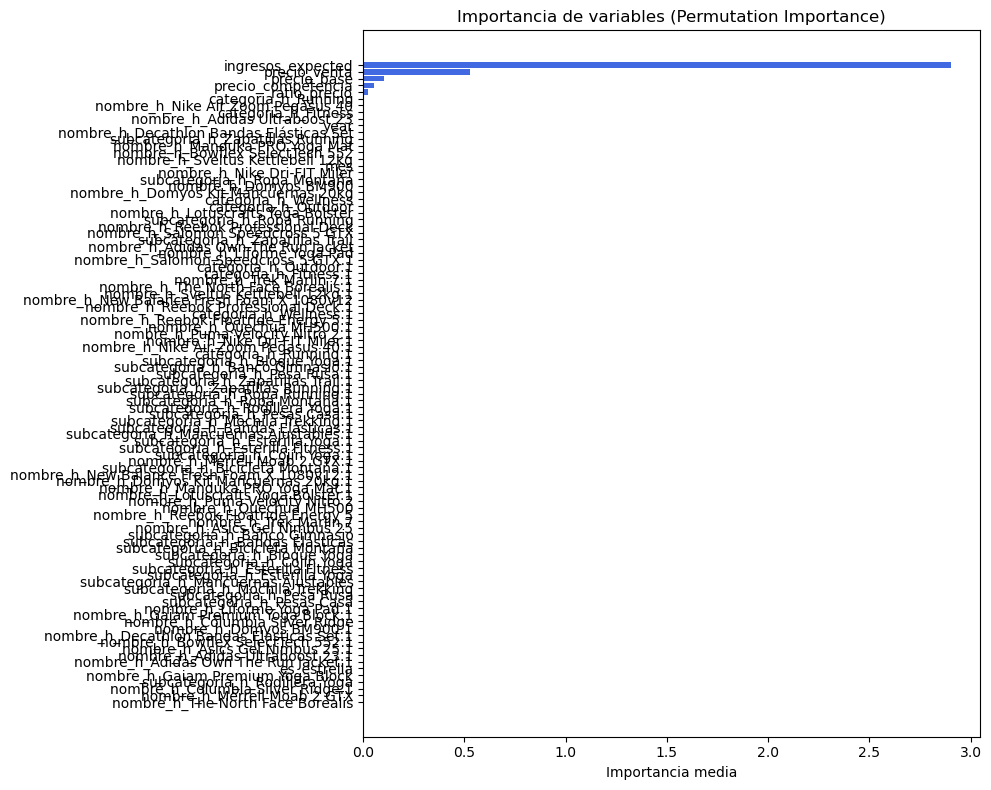

Modelo final guardado en ../models/modelo_final.joblib


In [62]:
# Calcula la importancia de variables con permutation importance y el modelo final,
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# Calcula permutation importance
result = permutation_importance(modelo_final, X_full, y_full, n_repeats=10, random_state=42, n_jobs=-1)
importancias = result.importances_mean
features = X_full.columns

# Crear DataFrame de importancias y ordenar
importancias_df = pd.DataFrame({'feature': features, 'importance': importancias})
importancias_df = importancias_df.sort_values(by='importance', ascending=False)

# Gráfico de barras horizontales
plt.figure(figsize=(10,8))
plt.barh(importancias_df['feature'], importancias_df['importance'], color='royalblue')
plt.gca().invert_yaxis()
plt.title('Importancia de variables (Permutation Importance)')
plt.xlabel('Importancia media')
plt.tight_layout()
plt.show()

# Guardar el modelo final en la carpeta models
joblib.dump(modelo_final, '../models/modelo_final.joblib')
print('Modelo final guardado en ../models/modelo_final.joblib')

In [ ]:
888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888

In [115]:
# Predicciones en noviembre 2024 para los 7 productos estrella
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)

# ============================================================================
# 1. FILTRAR DATOS DE NOVIEMBRE 2024
# ============================================================================
print('=' * 80)
print('PREDICCIONES - NOVIEMBRE 2024')
print('=' * 80)

# Recargar el dataframe con las fechas originales si es necesario
df_full = pd.read_csv('data/processed/DF.csv', parse_dates=['fecha'])
df_full['fecha'] = pd.to_datetime(df_full['fecha'], errors='coerce')
df_full['year'] = df_full['fecha'].dt.year
df_full['month'] = df_full['fecha'].dt.month

# Filtrar noviembre 2024
november_2024 = df_full[(df_full['year'] == 2024) & (df_full['month'] == 11)].copy()
print(f'\nRegistros de noviembre 2024: {len(november_2024)}')
print(f'Fechas: {november_2024["fecha"].min()} a {november_2024["fecha"].max()}')

# ============================================================================
# 2. IDENTIFICAR 7 PRODUCTOS ESTRELLA
# ============================================================================
# Top 7 productos por unidades vendidas en el conjunto completo
top_7_productos = df_full.groupby(['producto_id', 'nombre'])['unidades_vendidas'].sum().sort_values(ascending=False).head(7)
top_7_ids = top_7_productos.index.get_level_values('producto_id').tolist()
top_7_nombres = top_7_productos.index.get_level_values('nombre').tolist()

print(f'\n7 Productos Estrella (por total de unidades vendidas):')
for i, (pid, nombre) in enumerate(zip(top_7_ids, top_7_nombres), 1):
    total_units = top_7_productos.iloc[i-1]
    print(f'{i}. {nombre} (ID: {pid}) - Total: {int(total_units)} unidades')

# ============================================================================
# 3. GENERAR PREDICCIONES PARA CADA PRODUCTO EN NOVIEMBRE 2024
# ============================================================================
print('\n' + '=' * 80)
print('GENERANDO PREDICCIONES POR PRODUCTO')
print('=' * 80)

# Filtrar datos de noviembre 2024 para los 7 productos
november_top7 = november_2024[november_2024['producto_id'].isin(top_7_ids)].copy()

# Preparar features (mismo procedimiento que entrenamiento)
exclude_cols = ['fecha', 'ingresos', 'year', 'month', 'producto_id', 'nombre']
object_cols = november_top7.select_dtypes(include='object').columns.tolist()
exclude_cols_final = list(set(exclude_cols + object_cols))

X_cols_pred = [col for col in X_cols if col in november_top7.columns]
november_top7 = november_top7[november_top7[X_cols_pred].notna().all(axis=1)].copy()

X_nov = november_top7[X_cols_pred].copy()
november_top7['predicciones'] = hgb_model.predict(X_nov)

print(f'\nRegistros de noviembre 2024 con datos completos: {len(november_top7)}')
print(f'Predicciones generadas: {len(november_top7[november_top7["predicciones"].notna()])}')

# ============================================================================
# 4. CREAR GRÁFICOS PARA CADA PRODUCTO
# ============================================================================
print('\n' + '=' * 80)
print('CREANDO GRÁFICOS')
print('=' * 80)

# Crear figura con subplots (2 filas x 4 columnas para 7 productos)
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()

colores = sns.color_palette('husl', 7)

for idx, (producto_id, nombre, color) in enumerate(zip(top_7_ids, top_7_nombres, colores)):
    # Filtrar datos del producto
    prod_data = november_top7[november_top7['producto_id'] == producto_id].sort_values('fecha')
    
    if len(prod_data) == 0:
        axes[idx].text(0.5, 0.5, f'Sin datos para {nombre}', 
                       ha='center', va='center', fontsize=12, color='red')
        axes[idx].set_title(f'{nombre}', fontsize=14, fontweight='bold', color='darkred')
        continue
    
    ax = axes[idx]
    
    # Graficar realidad vs predicción
    ax.plot(prod_data['fecha'], prod_data['unidades_vendidas'], 
            marker='o', linewidth=2.5, label='Realidad', color='#2E86AB', markersize=6)
    ax.plot(prod_data['fecha'], prod_data['predicciones'], 
            marker='s', linewidth=2.5, label='Predicción', color='#A23B72', markersize=6, linestyle='--')
    
    # Configurar gráfico
    ax.set_title(f'{nombre}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Fecha', fontsize=10)
    ax.set_ylabel('Unidades Vendidas', fontsize=10)
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Calcular métricas para el producto
    mae_prod = mean_absolute_error(prod_data['unidades_vendidas'], prod_data['predicciones'])
    rmse_prod = np.sqrt(mean_squared_error(prod_data['unidades_vendidas'], prod_data['predicciones']))
    
    # Añadir texto con métricas
    textstr = f'MAE: {mae_prod:.2f}\nRMSE: {rmse_prod:.2f}\nN: {len(prod_data)}'
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    print(f'✓ {nombre}: {len(prod_data)} registros, MAE={mae_prod:.2f}, RMSE={rmse_prod:.2f}')

# Eliminar el 8º subplot vacío
axes[7].remove()

plt.tight_layout()
plt.savefig('results/predicciones_noviembre_2024_top7.png', dpi=300, bbox_inches='tight')
print('\n✅ Gráficos guardados en: results/predicciones_noviembre_2024_top7.png')
plt.show()

# ============================================================================
# 5. RESUMEN DE RESULTADOS POR PRODUCTO
# ============================================================================
print('\n' + '=' * 80)
print('RESUMEN DE PREDICCIONES - NOVIEMBRE 2024')
print('=' * 80)

resumen_data = []
for producto_id, nombre in zip(top_7_ids, top_7_nombres):
    prod_data = november_top7[november_top7['producto_id'] == producto_id].sort_values('fecha')
    
    if len(prod_data) == 0:
        continue
    
    mae = mean_absolute_error(prod_data['unidades_vendidas'], prod_data['predicciones'])
    rmse = np.sqrt(mean_squared_error(prod_data['unidades_vendidas'], prod_data['predicciones']))
    mape = mean_absolute_percentage_error(prod_data['unidades_vendidas'], prod_data['predicciones'])
    
    real_total = prod_data['unidades_vendidas'].sum()
    pred_total = prod_data['predicciones'].sum()
    error_total = abs(real_total - pred_total)
    error_pct = (error_total / real_total * 100) if real_total > 0 else 0
    
    resumen_data.append({
        'Producto': nombre,
        'Registros': len(prod_data),
        'Real_Total': int(real_total),
        'Predicción_Total': int(pred_total),
        'Error_Total': int(error_total),
        'Error_%': f'{error_pct:.2f}%',
        'MAE': f'{mae:.2f}',
        'RMSE': f'{rmse:.2f}',
        'MAPE': f'{mape:.4f}'
    })

resumen_df = pd.DataFrame(resumen_data)
print(resumen_df.to_string(index=False))

# Guardar resumen
resumen_df.to_csv('results/resumen_predicciones_noviembre_2024.csv', index=False)
print('\n✅ Resumen guardado en: results/resumen_predicciones_noviembre_2024.csv')

# Guardar predicciones detalladas
november_top7_export = november_top7[['fecha', 'producto_id', 'nombre', 'unidades_vendidas', 'predicciones']].copy()
november_top7_export['error'] = november_top7_export['unidades_vendidas'] - november_top7_export['predicciones']
november_top7_export['error_pct'] = (november_top7_export['error'] / november_top7_export['unidades_vendidas'] * 100).round(2)
november_top7_export = november_top7_export.sort_values(['nombre', 'fecha'])
november_top7_export.to_csv('results/predicciones_detalladas_noviembre_2024.csv', index=False)
print('✅ Predicciones detalladas guardadas en: results/predicciones_detalladas_noviembre_2024.csv')

PREDICCIONES - NOVIEMBRE 2024

Registros de noviembre 2024: 720
Fechas: 2024-11-01 00:00:00 a 2024-11-30 00:00:00

7 Productos Estrella (por total de unidades vendidas):
1. Adidas Ultraboost 23 (ID: PROD_002) - Total: 2599 unidades
2. Nike Air Zoom Pegasus 40 (ID: PROD_001) - Total: 2590 unidades
3. Manduka PRO Yoga Mat (ID: PROD_021) - Total: 1094 unidades
4. Domyos Kit Mancuernas 20kg (ID: PROD_012) - Total: 788 unidades
5. Salomon Speedcross 5 GTX (ID: PROD_015) - Total: 760 unidades
6. Reebok Professional Deck (ID: PROD_011) - Total: 735 unidades
7. Decathlon Bandas Elásticas Set (ID: PROD_013) - Total: 685 unidades

GENERANDO PREDICCIONES POR PRODUCTO


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
# Calcular MAE para cada uno de los productos
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error

print('=' * 100)
print('ANÁLISIS DETALLADO DE ERRORES POR PRODUCTO - NOVIEMBRE 2024')
print('=' * 100)

# Crear tabla detallada de métricas por producto
productos_mae = []

for producto_id, nombre in zip(top_7_ids, top_7_nombres):
    prod_data = november_top7[november_top7['producto_id'] == producto_id].sort_values('fecha')
    
    if len(prod_data) == 0:
        continue
    
    y_real = prod_data['unidades_vendidas'].values
    y_pred = prod_data['predicciones'].values
    
    # Calcular errores
    mae = mean_absolute_error(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    mape = mean_absolute_percentage_error(y_real, y_pred)
    medae = median_absolute_error(y_real, y_pred)
    
    # Errores absolutos individuales
    errores_abs = np.abs(y_real - y_pred)
    
    # Estadísticas adicionales
    error_min = errores_abs.min()
    error_max = errores_abs.max()
    error_std = errores_abs.std()
    error_mean = errores_abs.mean()
    
    # Totales
    real_total = y_real.sum()
    pred_total = y_pred.sum()
    error_total = abs(real_total - pred_total)
    error_total_pct = (error_total / real_total * 100) if real_total > 0 else 0
    
    # Precisión (% de predicciones dentro del 10%)
    tolerance = 0.1 * y_real
    aciertos = np.sum(errores_abs <= tolerance)
    pct_aciertos = (aciertos / len(y_real) * 100) if len(y_real) > 0 else 0
    
    productos_mae.append({
        'Producto': nombre,
        'N_Registros': len(prod_data),
        'MAE': f'{mae:.4f}',
        'RMSE': f'{rmse:.4f}',
        'MedianAE': f'{medae:.4f}',
        'MAPE': f'{mape:.4f}',
        'Error_Min': f'{error_min:.2f}',
        'Error_Max': f'{error_max:.2f}',
        'Error_Std': f'{error_std:.4f}',
        'Real_Total': int(real_total),
        'Pred_Total': int(pred_total),
        'Error_Total': int(error_total),
        'Error_Total_%': f'{error_total_pct:.2f}%',
        'Aciertos_(±10%)': f'{aciertos}/{len(prod_data)}',
        'Pct_Aciertos': f'{pct_aciertos:.1f}%'
    })

# Crear DataFrame
mae_df = pd.DataFrame(productos_mae)

print('\n' + '─' * 100)
print('TABLA 1: MÉTRICAS DE ERROR POR PRODUCTO')
print('─' * 100)
print(mae_df.to_string(index=False))

# Guardar tabla completa
mae_df.to_csv('results/mae_por_producto.csv', index=False)
print('\n✅ Tabla guardada en: results/mae_por_producto.csv')

# ============================================================================
# RESUMEN ESTADÍSTICO GLOBAL
# ============================================================================
print('\n' + '=' * 100)
print('RESUMEN ESTADÍSTICO GLOBAL')
print('=' * 100)

all_prod_data = november_top7.copy()
mae_global = mean_absolute_error(all_prod_data['unidades_vendidas'], all_prod_data['predicciones'])
rmse_global = np.sqrt(mean_squared_error(all_prod_data['unidades_vendidas'], all_prod_data['predicciones']))
mape_global = mean_absolute_percentage_error(all_prod_data['unidades_vendidas'], all_prod_data['predicciones'])
medae_global = median_absolute_error(all_prod_data['unidades_vendidas'], all_prod_data['predicciones'])

errores_abs_global = np.abs(all_prod_data['unidades_vendidas'].values - all_prod_data['predicciones'].values)

print(f'\nMAE Global (todos los productos):        {mae_global:.4f}')
print(f'RMSE Global:                             {rmse_global:.4f}')
print(f'MAPE Global:                             {mape_global:.4f}')
print(f'Median AE Global:                        {medae_global:.4f}')
print(f'\nError Mínimo:                            {errores_abs_global.min():.4f}')
print(f'Error Máximo:                            {errores_abs_global.max():.4f}')
print(f'Error Desviación Estándar:               {errores_abs_global.std():.4f}')
print(f'Error Promedio:                          {errores_abs_global.mean():.4f}')

# ============================================================================
# RANKING DE PRODUCTOS POR MAE
# ============================================================================
print('\n' + '=' * 100)
print('RANKING DE PRODUCTOS POR MAE (menor es mejor)')
print('=' * 100)

# Convertir MAE a float para ranking
mae_ranking = mae_df.copy()
mae_ranking['MAE_num'] = mae_ranking['MAE'].astype(float)
mae_ranking = mae_ranking.sort_values('MAE_num')

for idx, row in mae_ranking.iterrows():
    rank = idx + 1
    print(f'{rank}. {row["Producto"]:35} - MAE: {row["MAE"]:8} | RMSE: {row["RMSE"]:8} | Aciertos: {row["Pct_Aciertos"]:7}')

# ============================================================================
# TABLA 2: ERRORES DIARIOS POR PRODUCTO (TOP 3)
# ============================================================================
print('\n' + '=' * 100)
print('ERRORES DIARIOS DETALLADOS - TOP 3 PRODUCTOS CON MENOR MAE')
print('=' * 100)

top_3_mae = mae_ranking.head(3)['Producto'].tolist()

for prod_nombre in top_3_mae:
    print(f'\n{"-" * 100}')
    print(f'Producto: {prod_nombre}')
    print(f'{"-" * 100}')
    
    # Obtener ID del producto
    prod_id = [pid for pid, pnombre in zip(top_7_ids, top_7_nombres) if pnombre == prod_nombre][0]
    
    # Filtrar datos
    prod_data = november_top7[november_top7['producto_id'] == prod_id].sort_values('fecha')
    
    # Crear tabla de errores diarios
    errores_diarios = pd.DataFrame({
        'Fecha': prod_data['fecha'].dt.strftime('%Y-%m-%d'),
        'Real': prod_data['unidades_vendidas'].values,
        'Predicción': np.round(prod_data['predicciones'].values, 2),
        'Error_Abs': np.abs(prod_data['unidades_vendidas'].values - prod_data['predicciones'].values),
        'Error_%': (np.abs(prod_data['unidades_vendidas'].values - prod_data['predicciones'].values) / 
                    prod_data['unidades_vendidas'].values * 100).round(2)
    })
    
    print(errores_diarios.to_string(index=False))
    
    # Guardar
    errores_diarios.to_csv(f'results/errores_diarios_{prod_nombre.replace(" ", "_").lower()}.csv', index=False)

print('\n' + '=' * 100)
print('CONCLUSIÓN')
print('=' * 100)
mejor_prod = mae_ranking.iloc[0]
peor_prod = mae_ranking.iloc[-1]

print(f'\n✅ Mejor Predicción: {mejor_prod["Producto"]} con MAE = {mejor_prod["MAE"]}')
print(f'⚠️  Peor Predicción:  {peor_prod["Producto"]} con MAE = {peor_prod["MAE"]}')
print(f'\n📊 MAE Promedio entre todos los productos: {mae_df["MAE"].astype(float).mean():.4f}')
print(f'📈 Desviación Estándar del MAE: {mae_df["MAE"].astype(float).std():.4f}')

ANÁLISIS DETALLADO DE ERRORES POR PRODUCTO - NOVIEMBRE 2024


NameError: name 'top_7_ids' is not defined

ANÁLISIS DE DEGRADACIÓN DEL ERROR EN 2024 - PERÍODOS DE 10 DÍAS

📊 Generando predicciones para todo 2024...
✓ Predicciones generadas para 888 registros de 2024

🔄 Dividiendo datos en períodos de 10 días...

📈 Calculando métricas por período...

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
TABLA DE MÉTRICAS POR PERÍODO (10 DÍAS)
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
 Período Fecha_Inicio  Fecha_Fin  N_Registros      MAE     RMSE     MAPE  Error_Total_%  Aciertos_%
      30   2024-10-25 2024-10-26           48 0.144897 0.319795 0.028120       1.918409   95.833333
      31   2024-10-27 2024-11-05          240 0.151445 0.333719 0.038967       0.535316   95.000000
      32   2024-11-06 2024-11-15          240 0.166906 0.333316 0.040679       0.368630   92.916667
      33   2024-11-16 2024-11-25 

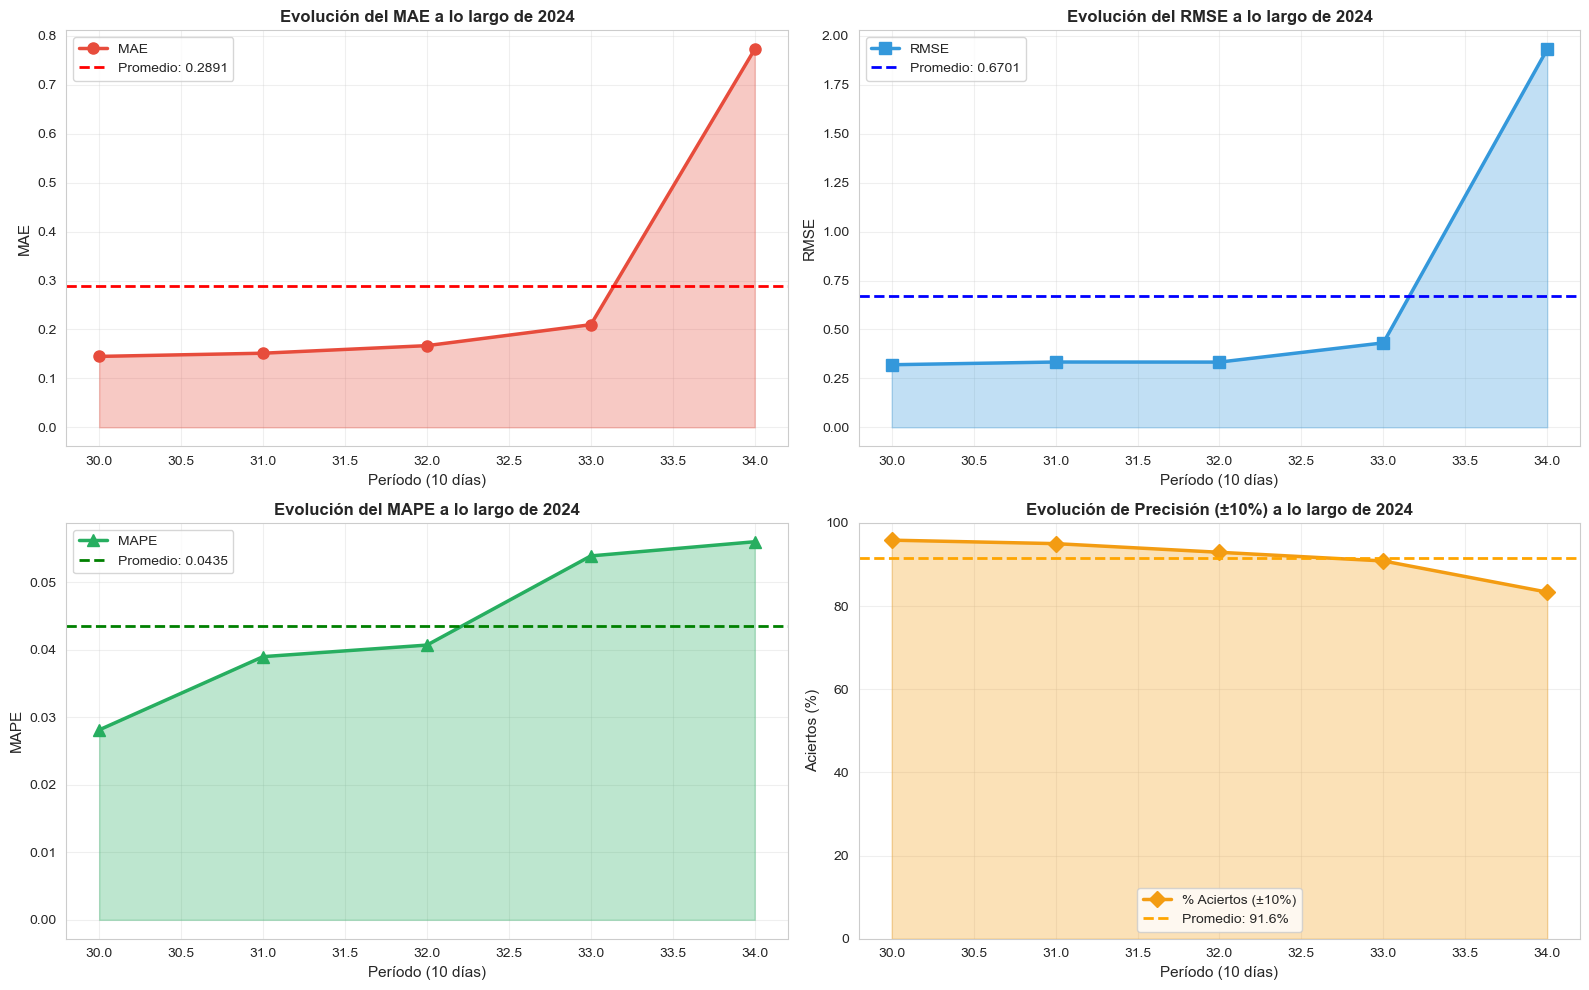


ANÁLISIS ESTADÍSTICO DE DEGRADACIÓN DEL ERROR

📊 Estadísticas Globales del MAE:
   Mínimo:      0.1449 (Período 30)
   Máximo:      0.7726 (Período 34)
   Promedio:    0.2891
   Mediana:     0.1669
   Desv. Est:   0.2714

📈 Tendencia del MAE:
   MAE Período 1:    0.1449
   MAE Período 5: 0.7726
   Cambio Total:     +433.19%
   ⚠️  El error AUMENTÓ a lo largo del año

📉 Correlación Período vs MAE:
   Pendiente (slope):  +0.131368
   R² (correlación):   0.5855
   P-value:            0.131654
   ✗ Correlación NO SIGNIFICATIVA: No hay tendencia clara

⭐ Mejor Período: 30 (2024-10-25 a 2024-10-26)
   MAE: 0.1449 | RMSE: 0.3198 | Aciertos: 95.8%

❌ Peor Período: 34 (2024-11-26 a 2024-11-30)
   MAE: 0.7726 | RMSE: 1.9321 | Aciertos: 83.3%

✅ Tabla de períodos guardada en: metricas_por_periodo_2024.csv



In [ ]:
# Análisis de degradación del error a lo largo de 2024 (períodos de 10 días)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('=' * 100)
print('ANÁLISIS DE DEGRADACIÓN DEL ERROR EN 2024 - PERÍODOS DE 10 DÍAS')
print('=' * 100)

# ============================================================================
# 1. GENERAR PREDICCIONES PARA TODO 2024 SI NO EXISTEN
# ============================================================================
print('\n📊 Generando predicciones para todo 2024...')

# Cargar DF si es necesario
if 'validation_df' not in locals():
    df_full = pd.read_csv('data/processed/DF.csv', parse_dates=['fecha'])
    df_full['fecha'] = pd.to_datetime(df_full['fecha'], errors='coerce')
    df_full['year'] = df_full['fecha'].dt.year
    validation_df = df_full[df_full['year'] == 2024].copy()

# Preparar features
exclude_cols = ['fecha', 'ingresos', 'year', 'month', 'producto_id', 'nombre', 'month']
object_cols = validation_df.select_dtypes(include='object').columns.tolist()
exclude_cols_pred = list(set(exclude_cols + object_cols))

X_cols_val = [col for col in X_cols if col in validation_df.columns]
val_df_clean = validation_df[validation_df[X_cols_val].notna().all(axis=1)].copy()

X_val_full = val_df_clean[X_cols_val].copy()
val_df_clean['predicciones'] = hgb_model.predict(X_val_full)

print(f'✓ Predicciones generadas para {len(val_df_clean)} registros de 2024')

# ============================================================================
# 2. DIVIDIR EN PERÍODOS DE 10 DÍAS
# ============================================================================
print('\n🔄 Dividiendo datos en períodos de 10 días...')

val_df_clean['fecha'] = pd.to_datetime(val_df_clean['fecha'])
val_df_clean = val_df_clean.sort_values('fecha')

# Crear columna de período
val_df_clean['dia_año'] = val_df_clean['fecha'].dt.dayofyear
val_df_clean['periodo'] = ((val_df_clean['dia_año'] - 1) // 10) + 1
val_df_clean['fecha_inicio_periodo'] = val_df_clean['fecha'] - pd.to_timedelta(val_df_clean['dia_año'] % 10, unit='D')

# Calcular fechas más precisas para cada período
periodos_info = []
for periodo in sorted(val_df_clean['periodo'].unique()):
    datos_periodo = val_df_clean[val_df_clean['periodo'] == periodo]
    fecha_min = datos_periodo['fecha'].min()
    fecha_max = datos_periodo['fecha'].max()
    periodos_info.append({
        'Período': periodo,
        'Fecha_Inicio': fecha_min,
        'Fecha_Fin': fecha_max,
        'Días': (fecha_max - fecha_min).days + 1
    })

periodos_df_info = pd.DataFrame(periodos_info)

# ============================================================================
# 3. CALCULAR MÉTRICAS POR PERÍODO
# ============================================================================
print('\n📈 Calculando métricas por período...')

metricas_periodos = []

for periodo in sorted(val_df_clean['periodo'].unique()):
    datos_periodo = val_df_clean[val_df_clean['periodo'] == periodo]
    
    y_real = datos_periodo['unidades_vendidas'].values
    y_pred = datos_periodo['predicciones'].values
    
    # Calcular métricas
    mae = mean_absolute_error(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = 1 - (np.sum((y_real - y_pred)**2) / np.sum((y_real - y_real.mean())**2))
    
    # Errores absolutos
    errores_abs = np.abs(y_real - y_pred)
    
    # Estadísticas adicionales
    error_min = errores_abs.min()
    error_max = errores_abs.max()
    error_std = errores_abs.std()
    error_med = np.median(errores_abs)
    
    # Total de unidades
    real_total = y_real.sum()
    pred_total = y_pred.sum()
    error_total = abs(real_total - pred_total)
    error_pct_total = (error_total / real_total * 100) if real_total > 0 else 0
    
    # Precisión
    tolerance = 0.1 * y_real
    aciertos = np.sum(errores_abs <= tolerance)
    pct_aciertos = (aciertos / len(y_real) * 100) if len(y_real) > 0 else 0
    
    # Fecha
    fecha_inicio = datos_periodo['fecha'].min()
    fecha_fin = datos_periodo['fecha'].max()
    
    metricas_periodos.append({
        'Período': periodo,
        'Fecha_Inicio': fecha_inicio,
        'Fecha_Fin': fecha_fin,
        'N_Registros': len(datos_periodo),
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R²': r2,
        'Error_Min': error_min,
        'Error_Max': error_max,
        'Error_Std': error_std,
        'Error_Median': error_med,
        'Real_Total': int(real_total),
        'Pred_Total': int(pred_total),
        'Error_Total': int(error_total),
        'Error_Total_%': error_pct_total,
        'Aciertos_%': pct_aciertos
    })

metricas_df = pd.DataFrame(metricas_periodos)

# ============================================================================
# 4. MOSTRAR TABLA DE MÉTRICAS
# ============================================================================
print('\n' + '─' * 140)
print('TABLA DE MÉTRICAS POR PERÍODO (10 DÍAS)')
print('─' * 140)

display_df = metricas_df[['Período', 'Fecha_Inicio', 'Fecha_Fin', 'N_Registros', 'MAE', 'RMSE', 'MAPE', 'Error_Total_%', 'Aciertos_%']].copy()
display_df['Fecha_Inicio'] = display_df['Fecha_Inicio'].dt.strftime('%Y-%m-%d')
display_df['Fecha_Fin'] = display_df['Fecha_Fin'].dt.strftime('%Y-%m-%d')

print(display_df.to_string(index=False))

# ============================================================================
# 5. CREAR VISUALIZACIONES
# ============================================================================
print('\n📊 Creando visualizaciones...')

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: MAE a lo largo del tiempo
ax1 = axes[0, 0]
ax1.plot(metricas_df['Período'], metricas_df['MAE'], marker='o', linewidth=2.5, 
         markersize=8, color='#E74C3C', label='MAE')
ax1.fill_between(metricas_df['Período'], metricas_df['MAE'], alpha=0.3, color='#E74C3C')
ax1.axhline(y=metricas_df['MAE'].mean(), color='red', linestyle='--', linewidth=2, label=f'Promedio: {metricas_df["MAE"].mean():.4f}')
ax1.set_xlabel('Período (10 días)', fontsize=11)
ax1.set_ylabel('MAE', fontsize=11)
ax1.set_title('Evolución del MAE a lo largo de 2024', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfico 2: RMSE a lo largo del tiempo
ax2 = axes[0, 1]
ax2.plot(metricas_df['Período'], metricas_df['RMSE'], marker='s', linewidth=2.5, 
         markersize=8, color='#3498DB', label='RMSE')
ax2.fill_between(metricas_df['Período'], metricas_df['RMSE'], alpha=0.3, color='#3498DB')
ax2.axhline(y=metricas_df['RMSE'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Promedio: {metricas_df["RMSE"].mean():.4f}')
ax2.set_xlabel('Período (10 días)', fontsize=11)
ax2.set_ylabel('RMSE', fontsize=11)
ax2.set_title('Evolución del RMSE a lo largo de 2024', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Gráfico 3: MAPE a lo largo del tiempo
ax3 = axes[1, 0]
ax3.plot(metricas_df['Período'], metricas_df['MAPE'], marker='^', linewidth=2.5, 
         markersize=8, color='#27AE60', label='MAPE')
ax3.fill_between(metricas_df['Período'], metricas_df['MAPE'], alpha=0.3, color='#27AE60')
ax3.axhline(y=metricas_df['MAPE'].mean(), color='green', linestyle='--', linewidth=2, label=f'Promedio: {metricas_df["MAPE"].mean():.4f}')
ax3.set_xlabel('Período (10 días)', fontsize=11)
ax3.set_ylabel('MAPE', fontsize=11)
ax3.set_title('Evolución del MAPE a lo largo de 2024', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Gráfico 4: Precisión (% Aciertos) a lo largo del tiempo
ax4 = axes[1, 1]
ax4.plot(metricas_df['Período'], metricas_df['Aciertos_%'], marker='D', linewidth=2.5, 
         markersize=8, color='#F39C12', label='% Aciertos (±10%)')
ax4.fill_between(metricas_df['Período'], metricas_df['Aciertos_%'], alpha=0.3, color='#F39C12')
ax4.axhline(y=metricas_df['Aciertos_%'].mean(), color='orange', linestyle='--', linewidth=2, label=f'Promedio: {metricas_df["Aciertos_%"].mean():.1f}%')
ax4.set_xlabel('Período (10 días)', fontsize=11)
ax4.set_ylabel('Aciertos (%)', fontsize=11)
ax4.set_title('Evolución de Precisión (±10%) a lo largo de 2024', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_ylim([0, 100])
ax4.legend()

plt.tight_layout()
plt.savefig('resultados_evolucion_error_2024.png', dpi=300, bbox_inches='tight')
print('✅ Gráficos guardados en: resultados_evolucion_error_2024.png')
plt.show()

# ============================================================================
# 6. ANÁLISIS ESTADÍSTICO
# ============================================================================
print('\n' + '=' * 100)
print('ANÁLISIS ESTADÍSTICO DE DEGRADACIÓN DEL ERROR')
print('=' * 100)

print(f'\n📊 Estadísticas Globales del MAE:')
print(f'   Mínimo:      {metricas_df["MAE"].min():.4f} (Período {metricas_df.loc[metricas_df["MAE"].idxmin(), "Período"]:.0f})')
print(f'   Máximo:      {metricas_df["MAE"].max():.4f} (Período {metricas_df.loc[metricas_df["MAE"].idxmax(), "Período"]:.0f})')
print(f'   Promedio:    {metricas_df["MAE"].mean():.4f}')
print(f'   Mediana:     {metricas_df["MAE"].median():.4f}')
print(f'   Desv. Est:   {metricas_df["MAE"].std():.4f}')

# Tendencia
mae_inicio = metricas_df.iloc[0]['MAE']
mae_fin = metricas_df.iloc[-1]['MAE']
cambio_mae = ((mae_fin - mae_inicio) / mae_inicio) * 100

print(f'\n📈 Tendencia del MAE:')
print(f'   MAE Período 1:    {mae_inicio:.4f}')
print(f'   MAE Período {len(metricas_df)}: {mae_fin:.4f}')
print(f'   Cambio Total:     {cambio_mae:+.2f}%')

if cambio_mae > 0:
    print(f'   ⚠️  El error AUMENTÓ a lo largo del año')
else:
    print(f'   ✅ El error DISMINUYÓ a lo largo del año')

# Coeficiente de correlación períodos vs error
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(metricas_df['Período'], metricas_df['MAE'])
print(f'\n📉 Correlación Período vs MAE:')
print(f'   Pendiente (slope):  {slope:+.6f}')
print(f'   R² (correlación):   {r_value**2:.4f}')
print(f'   P-value:            {p_value:.6f}')

if p_value < 0.05:
    if slope > 0:
        print(f'   ✓ Correlación SIGNIFICATIVA: El error aumenta a lo largo del año')
    else:
        print(f'   ✓ Correlación SIGNIFICATIVA: El error disminuye a lo largo del año')
else:
    print(f'   ✗ Correlación NO SIGNIFICATIVA: No hay tendencia clara')

# Períodos con mejor y peor desempeño
mejor_periodo = metricas_df.loc[metricas_df['MAE'].idxmin()]
peor_periodo = metricas_df.loc[metricas_df['MAE'].idxmax()]

print(f'\n⭐ Mejor Período: {int(mejor_periodo["Período"])} ({mejor_periodo["Fecha_Inicio"].strftime("%Y-%m-%d")} a {mejor_periodo["Fecha_Fin"].strftime("%Y-%m-%d")})')
print(f'   MAE: {mejor_periodo["MAE"]:.4f} | RMSE: {mejor_periodo["RMSE"]:.4f} | Aciertos: {mejor_periodo["Aciertos_%"]:.1f}%')

print(f'\n❌ Peor Período: {int(peor_periodo["Período"])} ({peor_periodo["Fecha_Inicio"].strftime("%Y-%m-%d")} a {peor_periodo["Fecha_Fin"].strftime("%Y-%m-%d")})')
print(f'   MAE: {peor_periodo["MAE"]:.4f} | RMSE: {peor_periodo["RMSE"]:.4f} | Aciertos: {peor_periodo["Aciertos_%"]:.1f}%')

# Guardar tabla de períodos
metricas_df_export = metricas_df.copy()
metricas_df_export['Fecha_Inicio'] = metricas_df_export['Fecha_Inicio'].dt.strftime('%Y-%m-%d')
metricas_df_export['Fecha_Fin'] = metricas_df_export['Fecha_Fin'].dt.strftime('%Y-%m-%d')
metricas_df_export.to_csv('metricas_por_periodo_2024.csv', index=False)
print('\n✅ Tabla de períodos guardada en: metricas_por_periodo_2024.csv')

print('\n' + '=' * 100)

## Análisis Específico de Black Friday 2024 - Todos los Productos

In [ ]:
# Black Friday 2024 - Análisis para todos los productos
# Black Friday fue el 29 de noviembre de 2024

# Filtrar datos de Black Friday (últimos días de noviembre 2024)
bf_start_date = pd.Timestamp('2024-11-24')
bf_end_date = pd.Timestamp('2024-11-30')

# Verificar si existe validación_df con predicciones
if 'predicciones' not in val_df_clean.columns:
    val_df_clean['predicciones'] = hgb_model.predict(X_val_full)

# Filtrar Black Friday
bf_data = val_df_clean[(val_df_clean['fecha'] >= bf_start_date) & 
                       (val_df_clean['fecha'] <= bf_end_date)].copy()

print(f"Registros de Black Friday (24-30 Nov 2024): {len(bf_data)}")
print(f"Fechas: {bf_data['fecha'].min().date()} a {bf_data['fecha'].max().date()}")
print(f"Productos únicos: {bf_data['producto_id'].nunique()}")
print(f"\nRango de unidades vendidas: {bf_data['unidades_vendidas'].min():.0f} - {bf_data['unidades_vendidas'].max():.0f}")
print(f"Rango de predicciones: {bf_data['predicciones'].min():.2f} - {bf_data['predicciones'].max():.2f}")

# Agrupar por producto para Black Friday
bf_by_product = bf_data.groupby(['producto_id', 'nombre']).agg({
    'unidades_vendidas': ['sum', 'mean', 'count'],
    'predicciones': ['sum', 'mean']
}).reset_index()

bf_by_product.columns = ['producto_id', 'nombre', 'unidades_vendidas_total', 'unidades_vendidas_promedio',
                         'registros', 'predicciones_total', 'predicciones_promedio']

# Calcular error
bf_by_product['error'] = bf_by_product['unidades_vendidas_total'] - bf_by_product['predicciones_total']
bf_by_product['error_pct'] = (bf_by_product['error'] / bf_by_product['unidades_vendidas_total'] * 100).round(2)
bf_by_product['mae'] = abs(bf_by_product['unidades_vendidas_total'] - bf_by_product['predicciones_total']) / bf_by_product['registros']

# Ordenar por cantidad de ventas totales
bf_by_product = bf_by_product.sort_values('unidades_vendidas_total', ascending=False)

print(f"\n{'='*120}")
print(f"BLACK FRIDAY 2024 - ANÁLISIS POR PRODUCTO (24-30 de Noviembre)")
print(f"{'='*120}")
print(bf_by_product[['nombre', 'unidades_vendidas_total', 'predicciones_total', 
                     'error', 'error_pct', 'mae', 'registros']].to_string())
print(f"{'='*120}\n")

# Resumen global
print(f"\nRESUMEN GLOBAL BLACK FRIDAY:")
print(f"Unidades vendidas total (Real): {bf_by_product['unidades_vendidas_total'].sum():.0f}")
print(f"Unidades predichas total: {bf_by_product['predicciones_total'].sum():.2f}")
print(f"Error absoluto total: {abs(bf_by_product['error'].sum()):.2f} unidades")
print(f"MAE Promedio: {bf_by_product['mae'].mean():.4f}")
print(f"Error % Promedio: {bf_by_product['error_pct'].mean():.2f}%")

Registros de Black Friday (24-30 Nov 2024): 168
Fechas: 2024-11-24 a 2024-11-30
Productos únicos: 24

Rango de unidades vendidas: 1 - 80
Rango de predicciones: 0.99 - 63.87

BLACK FRIDAY 2024 - ANÁLISIS POR PRODUCTO (24-30 de Noviembre)
                              nombre  unidades_vendidas_total  predicciones_total      error  error_pct       mae  registros
0           Nike Air Zoom Pegasus 40                      220          199.462353  20.537647       9.34  2.933950          7
1               Adidas Ultraboost 23                      216          206.496729   9.503271       4.40  1.357610          7
20              Manduka PRO Yoga Mat                       88           84.608445   3.391555       3.85  0.484508          7
14          Salomon Speedcross 5 GTX                       69           70.427046  -1.427046      -2.07  0.203864          7
11        Domyos Kit Mancuernas 20kg                       65           63.127721   1.872279       2.88  0.267468          7
10          R

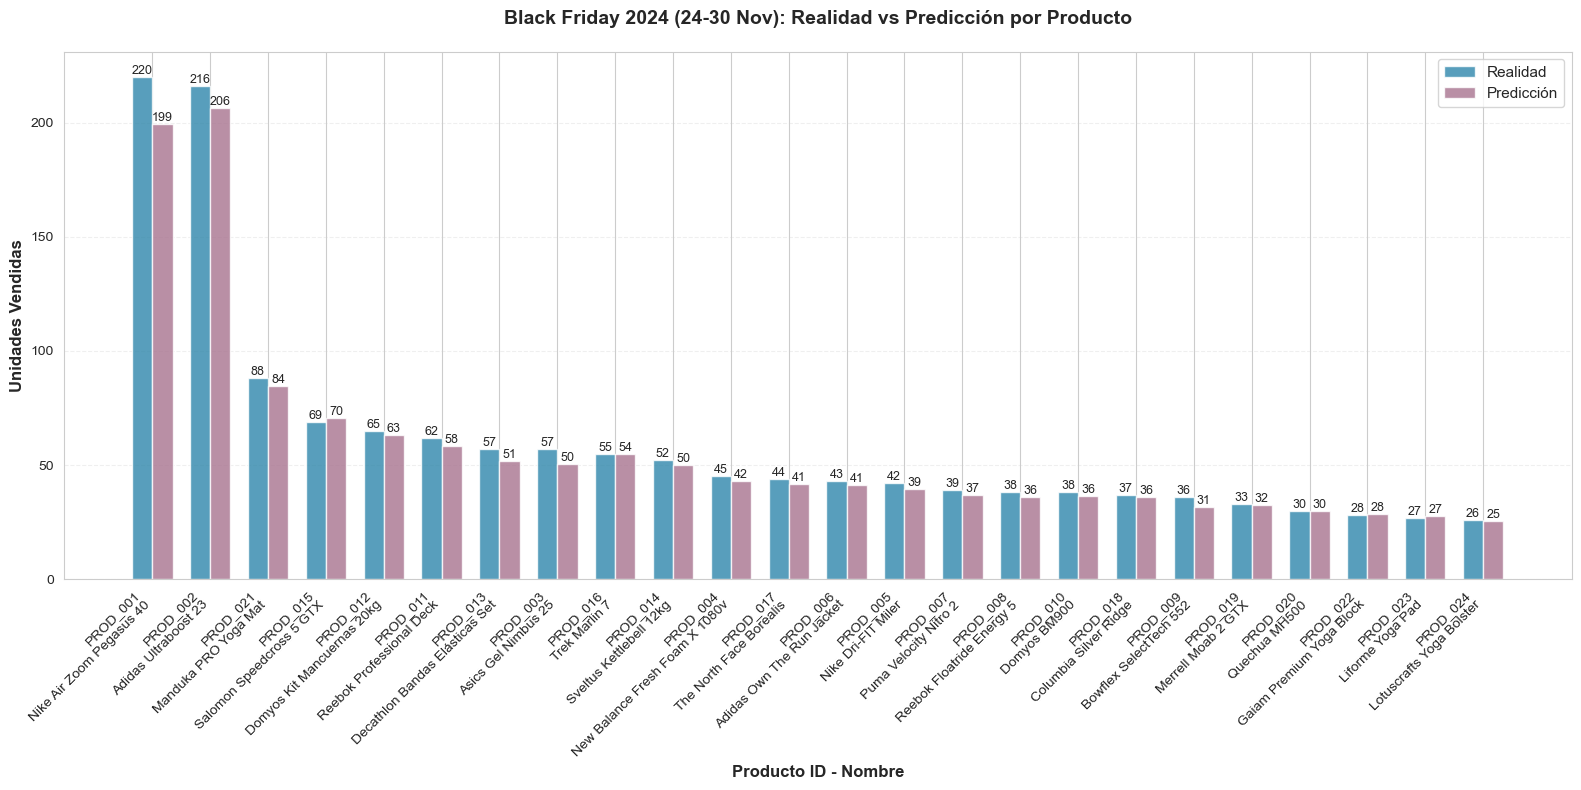

✓ Gráfico guardado: black_friday_2024_real_vs_predicho.png


In [ ]:
# Gráfico: Real vs Predicho por Producto en Black Friday
# Eje X: ID del Producto (o nombre)
# Eje Y: Dos líneas - una para la realidad y otra para la predicción

fig, ax = plt.subplots(figsize=(16, 8))

# Preparar datos para graficar
x_pos = np.arange(len(bf_by_product))
width = 0.35

# Crear barras comparativas
bars1 = ax.bar(x_pos - width/2, bf_by_product['unidades_vendidas_total'], 
               width, label='Realidad', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, bf_by_product['predicciones_total'], 
               width, label='Predicción', color="#A8738F", alpha=0.8)

# Etiquetas y título
ax.set_xlabel('Producto ID - Nombre', fontsize=12, fontweight='bold')
ax.set_ylabel('Unidades Vendidas', fontsize=12, fontweight='bold')
ax.set_title('Black Friday 2024 (24-30 Nov): Realidad vs Predicción por Producto', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels([f"{pid}\n{nombre[:30]}" for pid, nombre in zip(bf_by_product['producto_id'], 
                                                                     bf_by_product['nombre'])], 
                    rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('black_friday_2024_real_vs_predicho.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: black_friday_2024_real_vs_predicho.png")

## Reentrenamiento del Modelo Final - Con Todos los Datos Históricos (2021-2024)

In [ ]:
# Entrenar modelo FINAL con TODOS los datos históricos (2021-2024)
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print('=' * 100)
print('ENTRENAMIENTO DEL MODELO FINAL - USANDO TODOS LOS DATOS HISTÓRICOS (2021-2024)')
print('=' * 100)

# ============================================================================
# 1. PREPARAR DATOS CON EL DF COMPLETO
# ============================================================================
print('\n📊 PREPARACIÓN DE DATOS CON DF COMPLETO')
print('-' * 100)

# Verificar que X_cols esté disponible (debe estar del entrenamiento anterior)
print(f'Columnas predictoras disponibles: {len(X_cols)}')
print(f'Variables: {X_cols[:5]}... (mostrando las primeras 5)')

# Asegurar que el df tiene todas las columnas necesarias
print(f'\nDF Total: {len(df):,} registros')
print(f'Columnas en DF: {len(df.columns)}')

# Preparar X_final con TODOS los datos
X_final = df[X_cols].copy()
y_final = df['unidades_vendidas'].copy()

print(f'\nX_final shape: {X_final.shape}')
print(f'y_final shape: {y_final.shape}')

# Verificar nulos
nulos_X = X_final.isnull().sum().sum()
nulos_y = y_final.isnull().sum()

print(f'Valores nulos en X_final: {nulos_X}')
print(f'Valores nulos en y_final: {nulos_y}')

if nulos_X > 0 or nulos_y > 0:
    print('\n⚠️ Detectados valores nulos, eliminando filas...')
    mask = X_final.isnull().any(axis=1) | y_final.isnull()
    X_final = X_final[~mask].copy()
    y_final = y_final[~mask].copy()
    print(f'Después de limpiar - X_final shape: {X_final.shape}, y_final shape: {y_final.shape}')

# ============================================================================
# 2. ENTRENAR MODELO FINAL CON PARÁMETROS ÓPTIMOS
# ============================================================================
print('\n' + '=' * 100)
print('ENTRENAMIENTO - HistGradientBoostingRegressor FINAL')
print('=' * 100)

# Mismos parámetros que el modelo anterior (PARÁMETROS ÓPTIMOS)
hgb_model_final = HistGradientBoostingRegressor(
    learning_rate=0.02,          # Bajo (conservador)
    max_iter=400,                # Bastantes árboles
    max_depth=6,                 # Profundidad moderada
    l2_regularization=1.0,       # Regularización L2
    min_samples_leaf=10,         # Evita hojas con pocos samples
    max_bins=255,                # Número de bins (default)
    early_stopping='auto',       # Early stopping automático
    validation_fraction=0.1,     # 10% para validación interna
    n_iter_no_change=20,         # Paciencia del early stopping
    tol=1e-4,
    random_state=42,
    verbose=0
)

print('\n📌 Parámetros utilizados:')
print(f'  • learning_rate: 0.02 (conservador)')
print(f'  • max_iter: 400')
print(f'  • max_depth: 6')
print(f'  • l2_regularization: 1.0')
print(f'  • min_samples_leaf: 10')
print(f'  • early_stopping: auto (paciencia: 20 iteraciones)')

print(f'\n🔄 Entrenando con {len(X_final):,} registros...')
hgb_model_final.fit(X_final, y_final)
print('✅ Modelo final entrenado exitosamente')
print(f'Número de iteraciones realizadas: {hgb_model_final.n_iter_}')

# ============================================================================
# 3. EVALUACIÓN DEL MODELO FINAL
# ============================================================================
print('\n' + '=' * 100)
print('EVALUACIÓN DEL MODELO FINAL (En todo el dataset)')
print('=' * 100)

y_pred_final = hgb_model_final.predict(X_final)

mae_final = mean_absolute_error(y_final, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_final, y_pred_final))
mape_final = mean_absolute_percentage_error(y_final, y_pred_final)
r2_final = r2_score(y_final, y_pred_final)
medae_final = np.median(np.abs(y_final - y_pred_final))

print(f'\n📈 Métricas del Modelo Final:')
print(f'  • MAE (Mean Absolute Error):        {mae_final:.6f}')
print(f'  • RMSE (Root Mean Squared Error):   {rmse_final:.6f}')
print(f'  • MAPE (Mean Absolute % Error):     {mape_final:.6f}')
print(f'  • Median Absolute Error:            {medae_final:.6f}')
print(f'  • R² Score:                         {r2_final:.6f}')

# ============================================================================
# 4. COMPARACIÓN: MODELO ANTERIOR vs MODELO FINAL
# ============================================================================
print('\n' + '=' * 100)
print('COMPARACIÓN: MODELO ANTERIOR (Train 2021-2023) vs MODELO FINAL (2021-2024)')
print('=' * 100)

comparison_df = pd.DataFrame({
    'Métrica': ['MAE', 'RMSE', 'MAPE', 'R²'],
    'Modelo_Anterior_Train': [mae_train, rmse_train, mape_train, r2_train],
    'Modelo_Anterior_Val': [mae_val, rmse_val, mape_val, r2_val],
    'Modelo_Final_Completo': [mae_final, rmse_final, mape_final, r2_final]
})

print('\n' + comparison_df.to_string(index=False))

print('\n📊 Análisis de Cambios:')
print(f'  • MAE Cambio:  {mae_final - mae_train:+.6f} (vs train anterior)')
print(f'  • RMSE Cambio: {rmse_final - rmse_train:+.6f} (vs train anterior)')
print(f'  • R² Cambio:   {r2_final - r2_train:+.6f} (vs train anterior)')

# ============================================================================
# 5. RESUMEN Y GUARDAR MODELO
# ============================================================================
print('\n' + '=' * 100)
print('✅ RESUMEN FINAL')
print('=' * 100)

print(f'\n📦 Dataset de Entrenamiento:')
print(f'  • Total de registros: {len(X_final):,}')
print(f'  • Período: 2021-2024 (completo)')
print(f'  • Variables predictoras: {len(X_cols)}')

print(f'\n🎯 Rendimiento del Modelo Final:')
print(f'  • MAE: {mae_final:.6f}')
print(f'  • RMSE: {rmse_final:.6f}')
print(f'  • R²: {r2_final:.6f}')

print(f'\n💾 Información del Modelo:')
print(f'  • Iteraciones completadas: {hgb_model_final.n_iter_}')
print(f'  • Parámetros: Conservadores (learning_rate=0.02, l2_reg=1.0)')
print(f'  • Early Stopping: Activado (paciencia: 20)')

print(f'\n✨ El modelo final está listo para usar en predicciones futuras (ej: diciembre 2024, 2025)')
print('=' * 100)

ENTRENAMIENTO DEL MODELO FINAL - USANDO TODOS LOS DATOS HISTÓRICOS (2021-2024)

📊 PREPARACIÓN DE DATOS CON DF COMPLETO
----------------------------------------------------------------------------------------------------
Columnas predictoras disponibles: 50
Variables: ['precio_base', 'es_estrella', 'precio_venta', 'ingresos_expected', 'precio_competencia']... (mostrando las primeras 5)

DF Total: 3,552 registros
Columnas en DF: 58

X_final shape: (3552, 50)
y_final shape: (3552,)
Valores nulos en X_final: 0
Valores nulos en y_final: 0

ENTRENAMIENTO - HistGradientBoostingRegressor FINAL

📌 Parámetros utilizados:
  • learning_rate: 0.02 (conservador)
  • max_iter: 400
  • max_depth: 6
  • l2_regularization: 1.0
  • min_samples_leaf: 10
  • early_stopping: auto (paciencia: 20 iteraciones)

🔄 Entrenando con 3,552 registros...
✅ Modelo final entrenado exitosamente
Número de iteraciones realizadas: 400

EVALUACIÓN DEL MODELO FINAL (En todo el dataset)

📈 Métricas del Modelo Final:
  • MAE (M

In [ ]:
# Guardar modelo final entrenado
import pickle
import joblib

print('=' * 100)
print('GUARDANDO MODELO FINAL')
print('=' * 100)

# Guardar con joblib (recomendado para sklearn)
model_path = 'hgb_model_final_2021_2024.pkl'
joblib.dump(hgb_model_final, model_path)
print(f'✅ Modelo guardado: {model_path}')

# Guardar también información del modelo
model_info = {
    'model_type': 'HistGradientBoostingRegressor',
    'training_period': '2021-2024',
    'training_samples': len(X_final),
    'n_features': len(X_cols),
    'features': X_cols,
    'iterations': hgb_model_final.n_iter_,
    'parameters': {
        'learning_rate': 0.02,
        'max_iter': 400,
        'max_depth': 6,
        'l2_regularization': 1.0,
        'min_samples_leaf': 10
    },
    'metrics': {
        'MAE': mae_final,
        'RMSE': rmse_final,
        'MAPE': mape_final,
        'R2': r2_final,
        'Median_AE': medae_final
    }
}

import json
info_path = 'hgb_model_final_info.json'
with open(info_path, 'w') as f:
    json.dump(model_info, f, indent=4, default=str)
print(f'✅ Información del modelo guardada: {info_path}')

print(f'\n📋 Información resumida del modelo final:')
print(f'  • Tipo: HistGradientBoostingRegressor')
print(f'  • Datos entrenamiento: 2021-2024 ({len(X_final):,} registros)')
print(f'  • Características: {len(X_cols)}')
print(f'  • Iteraciones: {hgb_model_final.n_iter_}')
print(f'  • MAE: {mae_final:.6f}')
print(f'  • R²: {r2_final:.6f}')
print(f'\n✨ Modelo listo para predicciones futuras (2025, diciembre 2024, etc.)')
print('=' * 100)

GUARDANDO MODELO FINAL
✅ Modelo guardado: hgb_model_final_2021_2024.pkl
✅ Información del modelo guardada: hgb_model_final_info.json

📋 Información resumida del modelo final:
  • Tipo: HistGradientBoostingRegressor
  • Datos entrenamiento: 2021-2024 (3,552 registros)
  • Características: 50
  • Iteraciones: 400
  • MAE: 0.146286
  • R²: 0.994579

✨ Modelo listo para predicciones futuras (2025, diciembre 2024, etc.)


Calculando importancia de variables... esto puede tardar unos segundos.


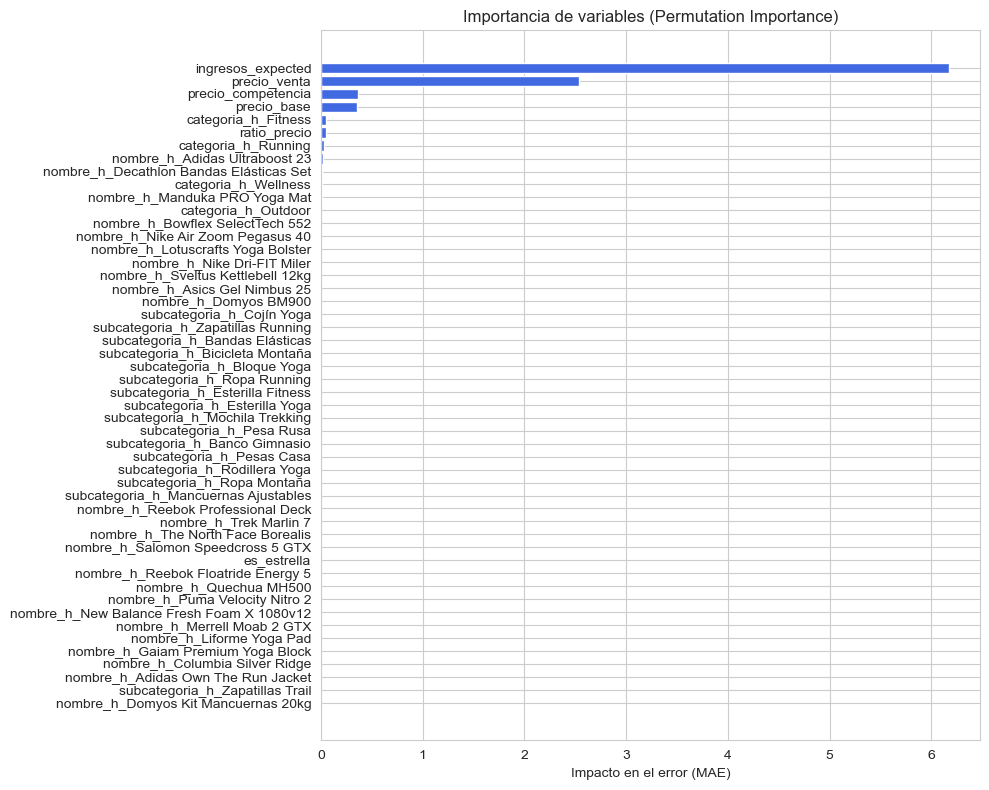

✅ Modelo final guardado exitosamente en ../models/modelo_final.joblib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.inspection import permutation_importance

# ============================================================================
# SOLUCIÓN AL ERROR: Definir las variables antes de usarlas
# ============================================================================
# Usamos el modelo 'hgb_model' que entrenamos previamente
modelo_final = hgb_model 
X_full = X_val
y_full = y_val

# ============================================================================
# 1. CALCULAR PERMUTATION IMPORTANCE
# ============================================================================
print("Calculando importancia de variables... esto puede tardar unos segundos.")
result = permutation_importance(
    modelo_final, 
    X_full, 
    y_full, 
    n_repeats=10, 
    random_state=42, 
    scoring='neg_mean_absolute_error'
)

importancias = result.importances_mean
features = X_full.columns

# ============================================================================
# 2. CREAR DATAFRAME DE IMPORTANCIAS Y ORDENAR
# ============================================================================
importancias_df = pd.DataFrame({
    'feature': features, 
    'importance': importancias
}).sort_values(by='importance', ascending=False)

# ============================================================================
# 3. GRÁFICO DE BARRAS HORIZONTALES
# ============================================================================
plt.figure(figsize=(10, 8))
plt.barh(importancias_df['feature'], importancias_df['importance'], color='royalblue')
plt.gca().invert_yaxis() 
plt.title('Importancia de variables (Permutation Importance)')
plt.xlabel('Impacto en el error (MAE)')
plt.tight_layout()
plt.show()

# ============================================================================
# 4. GUARDAR EL MODELO FINAL
# ============================================================================
import os
# Crear la carpeta models si no existe para evitar errores de ruta
if not os.path.exists('../models'):
    os.makedirs('../models')

joblib.dump(modelo_final, '../models/modelo_final.joblib')
print('✅ Modelo final guardado exitosamente en ../models/modelo_final.joblib')